# <div class="alert alert-block alert-success" dir="rtl" style="text-align: center;"><strong><span style="font-size: 20pt">Breast Cancer Using KNN Algorithm <br /></span></strong></div>

# <font color='blue'>What is K-Nearest Neighbor (KNN)?</font>
It is a supervised machine learning algorithm. The algorithm can be used to solve both classification and regression problem statements.

The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol ‘K’.

Let’s take a good look at a related real-world scenario before we get started with this awesome algorithm.

We are often notified that you share many characteristics with your nearest peers, whether it be your thinking process, working etiquettes, philosophies, or other factors. As a result, we build friendships with people we deem similar to us.

The KNN algorithm employs the same principle. Its aim is to locate all of the closest neighbours around a new unknown data point in order to figure out what class it belongs to. It’s a distance-based approach.

# <img src="https://www.researchgate.net/publication/343080916/figure/fig4/AS:915408186003458@1595261727790/K-Nearest-Neighbor-KNN-classification-principle.png" width=50% />

# <font color='red'>KNN in a Nutshell</font>
1- Pick a value for K (i.e. 5)

2- Take the K nearest neighbors of the new data point according to their Euclidean distance.
# <img src = "https://cdn-images-1.medium.com/max/800/1*ZrwEraj9S-u_KOWdKWc8sQ.png" width=50%>
3- Among these neighbors, count the number of data points in each category and assign the new data point to the category where you counted the most neighbors


#  <font color='green'>Algorithm</font>
1- Load the data.

2- Initialize K to your chosen number of neighbors.

3- For each example in the data.

3-1 Calculate the distance between the query example and the current example from the data.

3-2 Add the distance and the index of the example to an ordered collection.

4- Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances.

5- Pick the first K entries from the sorted collection.

6- Get the labels of the selected K entries.

7- If regression, return the mean of the K labels.

8- If classification, return the mode of the K labels.

# <font color='blue'>Some pros and cons of KNN</font>
pros :
1- Simplicity

2- Non-parametric

3- Great Sidekick

4- Very Sensitive

5- Versatility

6- Non-Linear Performance

cons:

1- Costly Computation : Unfortunately, k Nearest Neighbor is a hungry machine learning algorithm since it has to calculate the proximity between each neighbors for every single value in the dataset.
This doesn't mean it's completely unusable, it's just that it falls out of favor and becomes impractical when you enter the world of big data or similar applications.

2- RAM Monster : It's not just the CPU that takes a hit with k Nearest Neighbor, RAM also gets occupied when this little monster is working. kNN stores all its values in the RAM and again, you might not notice it with small implementations but try to work on a large database and

3- Significant Parameters : Although kNN has few parameters to tune this can trick the analyst. k parameter for neighbor amounts and parameter for how distance is calculated can make a huge difference in the outcomes.

4- Small Dimensions Only : If you want to work on datasets with many features this can be problematic with kNN.
Let's say you have 1 million rows with 100 classes. With a 30/70 test/training split, kNN will have to calculate 100 subtraction, 100 squares and 1 square root for each row (700.000 training rows). Just gives an idea why it gets difficult with large datasets and high feature/class numbers when kNN is being used

5- Equal Treatment : Equal Treatment is almost always good but here is a case.
Since kNN is non-parametric and it doesn't make any assumptions, this means all the attributes will be treated as equally important for the results.
This is simply not always the case and if you want to navigate around noise in a noisy data kNN may not be suitable for this case.

6- Handling Missing Values : KNN can't handle data with missing values unless you apply a process called imputation. This means missing values in your data will be filled with certain numerical values such as averages, ones, zeros etc.
This can be a tedious extra task and it can also introduce wrong bias to the data.
Luckily, there are readily available tools to impute data in a practical way such as KnnImpute (i.e.: sklearn.impute.KNNImputer) and dealing with missing data is usually just a reality of Data Science.

# <font color='red'>KNN in python - Breast Cancer Dataset</font>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [5]:
df['target']=pd.Series(cancer['target'])

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(['target'], axis = 1)
y = df['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , random_state=42)

In [10]:
print ("Shape of Train Data:", X_train.shape)
print ("Shape of Test Data:", X_test.shape)

Shape of Train Data: (426, 30)
Shape of Test Data: (143, 30)


In [11]:
y_train.shape

(426,)

<AxesSubplot:xlabel='target', ylabel='count'>

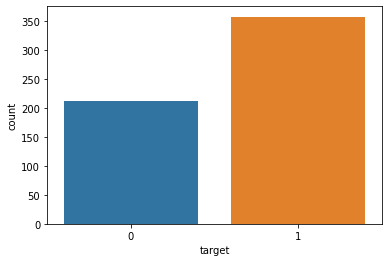

In [12]:
sns.countplot(y)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier()
#n_neighbors = 5
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(X_test)

# <font color='green'>knn.score()</font>
Returns the mean accuracy on the given test data and labels.

In [16]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9342723004694836
0.965034965034965


# <font color='blue'>Model Evaluation</font>

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.96      0.99      0.97        89

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



<AxesSubplot:>

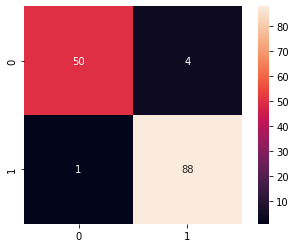

In [19]:
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True , annot=True)

# <font color='red'> How do we select the right value of K? </font>
We don’t have a particular method for determining the correct value of K. Here, we’ll try to test the model’s accuracy for different K values. The value of K that delivers the best accuracy for both training and testing data is selected.

## <font color='red'> It is recommended to always select an odd value of K </font>
When the value of K is set to even, a situation may arise in which the elements from both groups are equal.In this condition, the model would be unable to do the correct classification for you. Here the model will randomly assign any of the two classes to this new unknown data.
Choosing an odd value for K is preferred because such a state of equality between the two classes would never occur here. Due to the fact that one of the two groups would still be in the majority, the value of K is selected as odd.

# <img src="https://editor.analyticsvidhya.com/uploads/369941_-pMkFM7U6GX22WUCLG5g2g.png" width="50%"/>

# <font color='green'>The impact of selecting a smaller or larger K value on the model</font>
<font color = "Orange"> Larger K value : The case of underfitting occurs when the value of k is increased. In this case, the model would be unable to correctly learn on the training data. </font>

<font color = "purple">Smaller k value : The condition of overfitting occurs when the value of k is smaller. The model will capture all of the training data, including noise. The model will perform poorly for the test data in this scenario.</font>

# 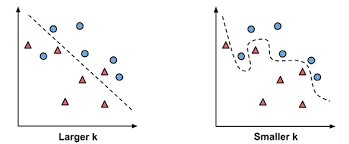


# <font color='blue'>How does KNN work for Regression problem statements?</font>
KNN employs a mean/average method for predicting the value of new data. Based on the value of K, it would consider all of the nearest neighbours.
The algorithm attempts to calculate the mean for all the nearest neighbours’ values until it has identified all the nearest neighbours within a certain range of the K value.

Consider the diagram below, where the value of k is set to 3. It will now calculate the mean (52) based on the values of these neighbours (50, 55, and 51) and allocate this value to the unknown data.
# <img src="https://editor.analyticsvidhya.com/uploads/89953Screenshot%202021-05-13%20at%206.53.40%20AM.png" width="50%"/>


# <font color='red'>Optimal value of K</font>

In [20]:
error_rate = []
# Might take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

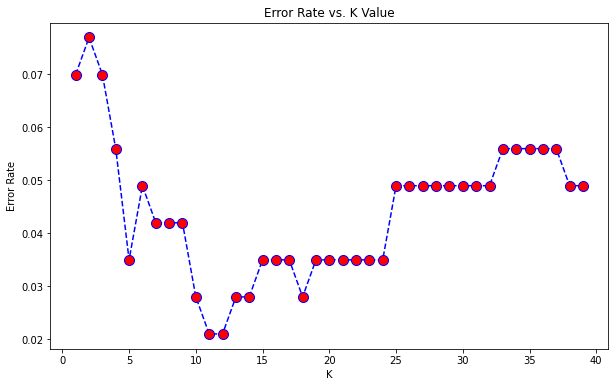

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [22]:
knn = KNeighborsClassifier(n_neighbors=11)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [24]:
knn.score(X_train, y_train)

0.9342723004694836

In [25]:
knn.score(X_test, y_test)

0.9790209790209791

In [26]:
y_pred2 = knn.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.98      0.99      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



<AxesSubplot:>

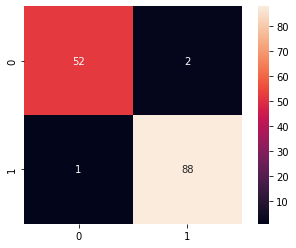

In [28]:
cm =confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, square=True , annot=True)